# MNIST 的手寫字型

## 套件

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

Using Theano backend.


其中的keras是我們選用非常方便的deep learning套件, 他甚至幫我們準備好了MNIST等這類有名的資料庫。

## 讀入MNIST資料

In [2]:
(x0_train,y0_train), (x0_test, y0_test) = mnist.load_data()

最親切的是他還分好訓練資料和測試資料, 我們來看看各有多少筆資料。

In [3]:
print("訓練資料筆數:", len(x0_train))
print("測試資料筆數:", len(x0_test))

訓練資料筆數: 60000
測試資料筆數: 10000


## 看看資料內容

我們來看看資料的內容長什麼樣子。

In [4]:
ind = 6243
X = x0_train[ind]

In [5]:
x0_train[ind]   #淺0~255深(灰階)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  51,
        128, 212, 254, 254, 254, 254, 211,  69,   0,   0,   0,   0,   0,
          0,   0],
       [  

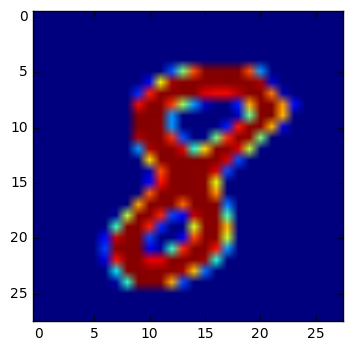

In [6]:
plt.imshow(X)

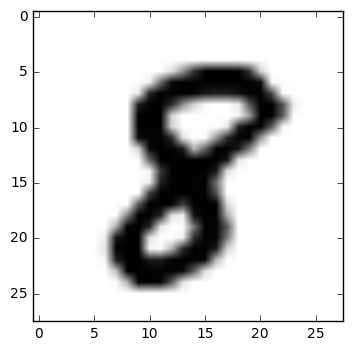

In [7]:
plt.imshow(X, cmap='Greys') #改成灰階顯示

堅持不要外框。

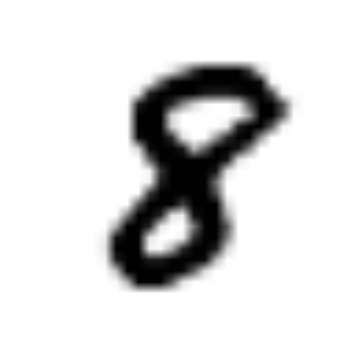

In [8]:
fig, ax = plt.subplots()
ax.set_axis_off()
plt.imshow(X, cmap='Greys')

看一下「正確答案」。

In [9]:
y0_train[ind]

8

## 互動展示(複習)

In [10]:
from ipywidgets import interact

In [11]:
def show(ind):
    print("數字: ", y0_train[ind])
    fig, ax = plt.subplots()
    ax.set_axis_off()
    plt.imshow(x0_train[ind], cmap='Greys')

數字:  8


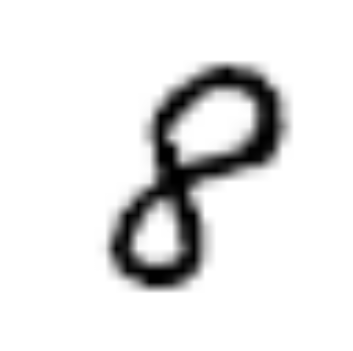

In [12]:
interact(show, ind=(0, 59999))

## 訓練資料整理

現在每個訓練資料都是 28x28 的矩陣, 但我們常常都是「拉平」的向量, 也就是每筆輸入可能是 784 (=28x28) 的向量。

In [20]:
x_train = x0_train.reshape(60000, 28*28)   #一般型的矩陣我們稱之為tensor

In [22]:
x_train[ind]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,  51, 128, 212, 254,
       254, 254, 254, 211,  69,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,  26, 164, 24

In [13]:
x_test = x0_test.reshape(10000, 28*28)   #[練習]把x0_test也改成「平的」向量

In [26]:
x_test[234]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  32,  6

## 測試資料整理

輸出原本是 0-9 的數字, 但我們想改成辨識資料是 0 就要輸出     
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]    
是 3 就是     
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]       
等等。

In [14]:
y0_train[ind]

8

In [15]:
from keras.utils import np_utils  #將 Output 從特定類別轉換成 one-hot encoding 的形式

In [16]:
y_train = np_utils.to_categorical(y0_train, 10)

In [17]:
y_train[ind]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.])

In [18]:
print("改變前: ", y0_train[ind])
print("改變後: ", y_train[ind])

改變前:  8
改變後:  [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]


In [19]:
y_test = np_utils.to_categorical(y0_test, 10) #[練習] 把 y0_test 也修改過來

In [20]:
print("改變前: ", y0_test[ind])
print("改變後: ", y_test[ind])

改變前:  7
改變後:  [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
